<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_NN_1_Martin_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [1]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

In [34]:
#keep the results
import pandas as pd
df = pd.DataFrame(columns=["description","epoch","loss","acc","min_loss","min_val_loss","train_loss_list","val_loss_list"])

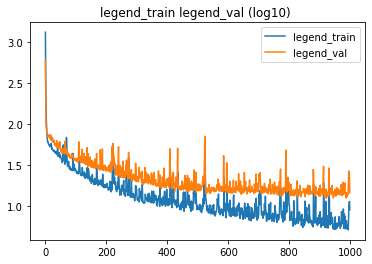

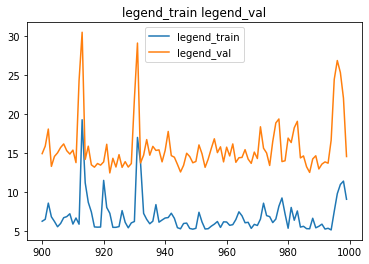

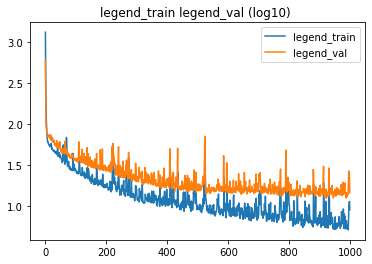

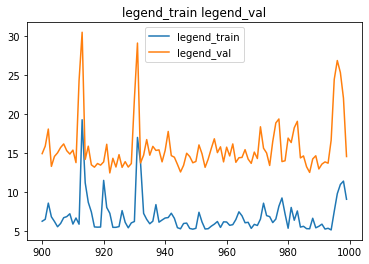

0    None
1    None
dtype: object

In [40]:
df.apply(lambda x: print_plot('legend_train','legend_val',x.train_loss_list, x.val_loss_list), axis=1)

In [37]:
def add_row_data_dispaly_result(df,description,epoch,X_test,y_test,model,history):
  loss, acc = model.evaluate(X_test, y_test)
  
  #TODO loss: 7.5215 - mse: 7.5215 - val_loss: 15.3355 - val_mse: 15.3355
  train_loss_list = history.history['loss']
  val_loss_list = history.history['val_loss']
  min_loss = min(train_loss_list)
  min_val_loss = min(val_loss_list)
  
  df.loc[len(df)] = [description,epoch,loss,acc,min_loss,min_val_loss,train_loss_list,val_loss_list]
  
  print_plot('loss','val_loss',train_loss_list,val_loss_list)
  display(df.drop(columns=['train_loss_list','val_loss_list']).tail(1))

  return df

def print_all_plots(df,legend_train,legend_val):
  df.apply(lambda x: print_plot(legend_train,legend_val,x.train_loss_list, x.val_loss_list), axis=1)

def print_plot(legend_train,legend_val,train_list,val_list):
  #train_loss_list = history.history[train_param]
  #val_loss_list = history.history[val_param]

  x = np.arange(len(train_loss_list))

  plt.plot(x, np.log10(train_list))
  plt.plot(x, np.log10(val_list))
  plt.legend([legend_train, legend_val])
  plt.title(legend_train+" "+legend_val+" (log10) ")
  plt.show()

  x_from = 900
  plt.plot(x[x_from:], train_list[x_from:])
  plt.plot(x[x_from:], val_list[x_from:])
  plt.legend([legend_train, legend_val])
  plt.title(legend_train+" "+legend_val)
  plt.show()

# Tasks

From the dataset, extract training and testing features and labels.

In [5]:
data = boston_housing.load_data(test_split=0.2)

In [6]:
type(data)

tuple

In [7]:
data[0][0].shape

(404, 13)

In [8]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


In [9]:
X_train.shape

(404, 13)

Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [10]:
X_train.shape[1]

13

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_1 = Sequential()
model_1.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(1))

Print the model summary to get an overview of it in the cell below.

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [13]:
model_1.compile(optimizer='adam', loss = 'mse', metrics='mse')

Fit the model on the train data. 1000 epochs should be more than enough. 

In [14]:
history_1 = model_1.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 45ms/step - loss: 2280.2062 - mse: 2280.2062 - val_loss: 614.8892 - val_mse: 614.8892
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 477.0840 - mse: 477.0840 - val_loss: 248.1683 - val_mse: 248.1683
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 229.1964 - mse: 229.1964 - val_loss: 98.8329 - val_mse: 98.8329
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 110.3786 - mse: 110.3786 - val_loss: 88.8536 - val_mse: 88.8536
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 80.2275 - mse: 80.2275 - val_loss: 88.1509 - val_mse: 88.1509
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 76.0837 - mse: 76.0837 - val_loss: 76.2217 - val_mse: 76.2217
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 70.6261 - mse: 70.6261 - val_loss: 75.2319 - val_mse: 75.2319
Epoch 8/1000
11/11 [=============

Finally, evaluate your model on the test data and get the score.

In [15]:
loss_1, acc_1 = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 26.4863 - mse: 26.4863


#Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

## Plot the loss on the training AND validation set for each epoch

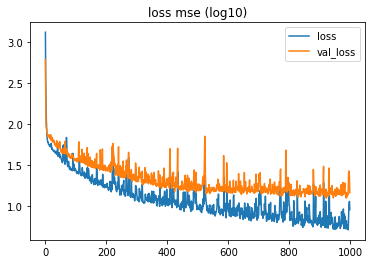

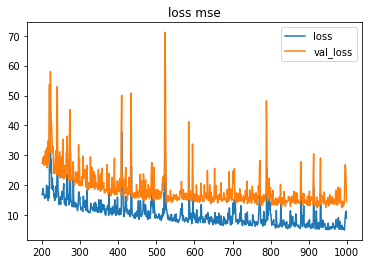

In [16]:
import matplotlib.pyplot as plt

train_loss_list = history_1.history['loss']
val_loss_list = history_1.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 200
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

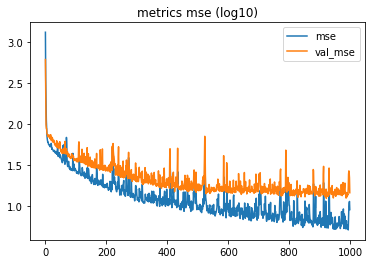

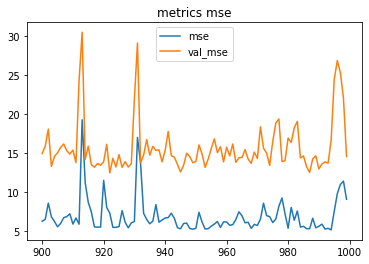

In [17]:
train_loss_list = history_1.history['mse']
val_loss_list = history_1.history['val_mse']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

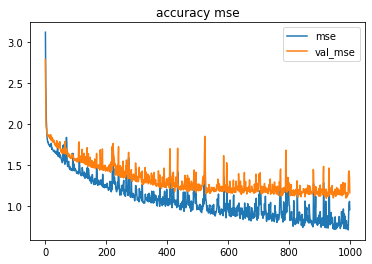

In [18]:
train_loss_list = history_1.history['mse']
val_loss_list = history_1.history['val_mse']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['mse', 'val_mse'])
plt.title("accuracy mse")
plt.show()

### loss min (5.671, 14.267)

In [19]:
df.drop(columns=['model','history']).tail(1)

,description,epoch,loss,acc,min_loss,min_val_loss,min_mse,min_val_mse


In [20]:
min(train_loss_list),min(val_loss_list)

(5.117258548736572, 12.449516296386719)

4/4 [==============================] - 0s 2ms/step - loss: 26.4863 - mse: 26.4863


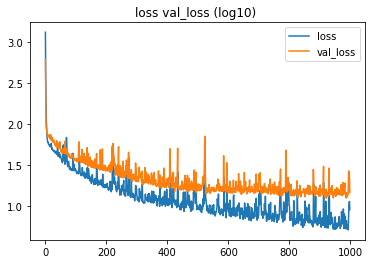

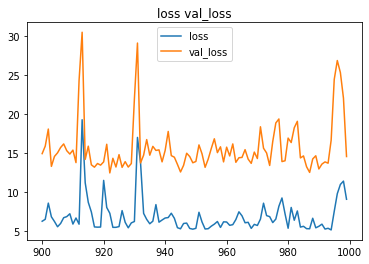

,description,epoch,loss,acc,min_loss,min_val_loss
1,2 layer,1000,26.486334,26.48633,5.117259,12.449516


In [39]:
df = add_row_data_dispaly_result(df,'2 layer',1000,X_test, y_test,model_1,history_1)

In [ ]:
df

## reduce the number of neurons in your hidden layers to 32

In [ ]:
model_2 = Sequential()
model_2.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dense(1))
model_2.summary()

In [ ]:
model_2.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_2 = model_2.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_2.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_2.history['loss']
val_loss_list = history_2.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (7.512, 15.619)

In [ ]:
min(train_loss_list),min(val_loss_list)

## increase the number of neurons in your hidden layers to 128

In [ ]:
model_3 = Sequential()
model_3.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dense(1))
model_3.summary()

In [ ]:
model_3.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_3 = model_3.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_3.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_3.history['loss']
val_loss_list = history_3.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (6.318, 13.623)

In [ ]:
min(train_loss_list),min(val_loss_list)

##add more hidden layers,2 more

In [ ]:
model_4 = Sequential()
model_4.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(1))
model_4.summary()

In [ ]:
model_4.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_4 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_4.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_4.history['loss']
val_loss_list = history_4.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (3.507, 12.399)

In [ ]:
min(train_loss_list),min(val_loss_list)

##add some regularization

 #### L2-regularization

In [ ]:
from keras import regularizers

model_5 = Sequential()
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_5.add(Dense(1))
model_5.summary()

In [ ]:
model_5.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_5 = model_5.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_5.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_5.history['loss']
val_loss_list = history_5.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

#### loss min (5.982, 12.735)

In [ ]:
min(train_loss_list),min(val_loss_list)

In [ ]:
model_6 = Sequential()
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(1))
model_6.summary()

In [ ]:
model_6.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_6 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_6.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_6.history['loss']
val_loss_list = history_6.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

In [ ]:
train_metrics_list = history_6.history['mse']
val_metrics_list = history_6.history['val_mse']

x = np.arange(len(train_metrics_list))

plt.plot(x, np.log10(train_metrics_list))
plt.plot(x, np.log10(val_metrics_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_metrics_list[x_from:])
plt.plot(x[x_from:], val_metrics_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

### loss min (1.175, 12.491)

In [ ]:
min(train_loss_list),min(val_loss_list)

In [ ]:
min(train_metrics_list),min(val_metrics_list)

###dropout

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model_7 = Sequential()
model_7.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(1))
model_7.summary()

In [ ]:
model_7.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_7 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

In [ ]:
loss, acc = model_7.evaluate(X_test, y_test)

In [ ]:
train_loss_list = history_7.history['loss']
val_loss_list = history_7.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

In [ ]:
train_metrics_list = history_7.history['mse']
val_metrics_list = history_7.history['val_mse']

x = np.arange(len(train_metrics_list))

plt.plot(x, np.log10(train_metrics_list))
plt.plot(x, np.log10(val_metrics_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_metrics_list[x_from:])
plt.plot(x[x_from:], val_metrics_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

#### loss min(0.224,10.806)

In [ ]:
min(train_loss_list),min(val_loss_list)

In [ ]:
min(train_metrics_list),min(val_metrics_list)

#The End